<a href="https://colab.research.google.com/github/CODE-BLANK01/IIIT-assignments/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=79d7d219f90cf2ae562ed1c63a7a7de8ddd381e7a6f8de8caac70467470f4abc
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Giraffe'
topic2 = 'Banana'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

This is what the text looks like:

In [3]:
es2

'La banana,[2]\u200b conocida también como banano, plátano,[3]\u200b guineo maduro, guineo, cambur o gualele, es un fruto comestible de varios tipos de grandes plantas herbáceas del género Musa (de origen indomalayo). A estas plantas de gran porte que tienen aspecto de arbolillo se las denomina plataneras, bananeros, bananeras, plátanos o bananos.[4]\u200b \nEs un fruto con cualidades variables en tamaño, color y firmeza, alargado, generalmente curvado y carnoso, rico en almidón, cubierto con una cáscara, que puede ser verde, amarilla, roja, púrpura, dorada o marrón cuando está madura. Los frutos crecen en piñas que cuelgan de la parte superior de la planta. Casi todos los plátanos en la actualidad son frutos estériles que no producen semillas fructificantes y provienen de dos especies silvestres: Musa acuminata y Musa balbisiana. El nombre científico de la mayoría de los plátanos cultivados es Musa × paradisiaca, el híbrido Musa acuminata × M. balbisiana, con distintas denominaciones 

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [5]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [6]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [9]:
print(es2)

labananaconocidatambincomobananopltanoguineomaduroguineocamburogualeleesunfrutocomestibledevariostiposdegrandesplantasherbceasdelgneromusadeorigenindomalayoaestasplantasdegranportequetienenaspectodearbolilloselasdenominaplatanerasbananerosbananeraspltanosobananosesunfrutoconcualidadesvariablesentamaocoloryfirmezaalargadogeneralmentecurvadoycarnosoricoenalmidncubiertoconunacscaraquepuedeserverdeamarillarojaprpuradoradaomarrncuandoestmaduralosfrutoscrecenenpiasquecuelgandelapartesuperiordelaplantacasitodoslospltanosenlaactualidadsonfrutosestrilesquenoproducensemillasfructificantesyprovienendedosespeciessilvestresmusaacuminataymusabalbisianaelnombrecientficodelamayoradelospltanoscultivadosesmusaparadisiacaelhbridomusaacuminatambalbisianacondistintasdenominacionesvarocultivaresdependiendodesuconstitucingenmicalospltanosdelosqueseconocenmsdemilvariedadesproporcionanalimentoagrandespoblacioneshumanasendosformasprincipalespltanosdepostreodulcesparacomerprincipalmentecrudoscongranpartedesufcul

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [10]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

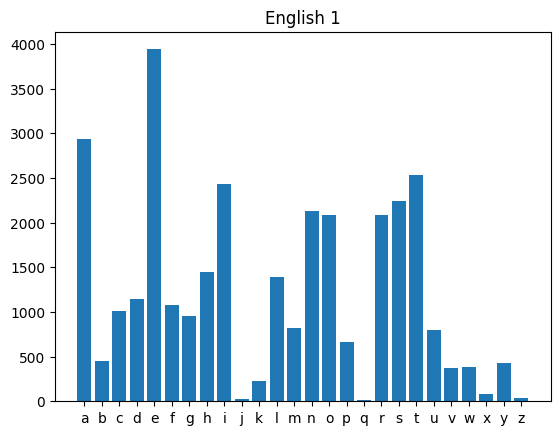

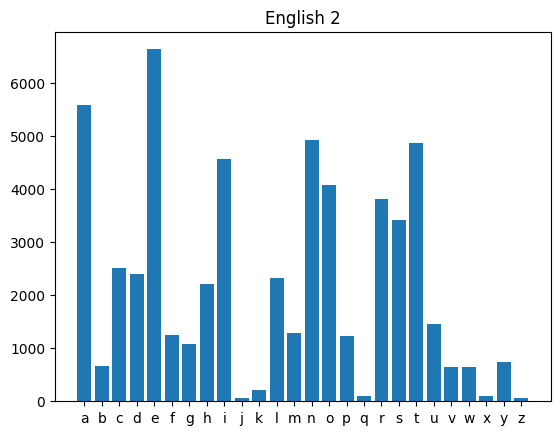

In [11]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

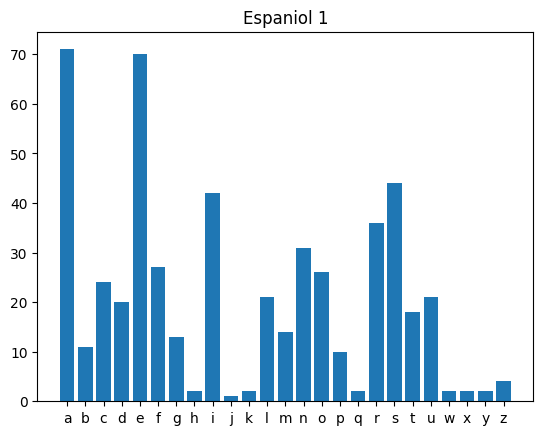

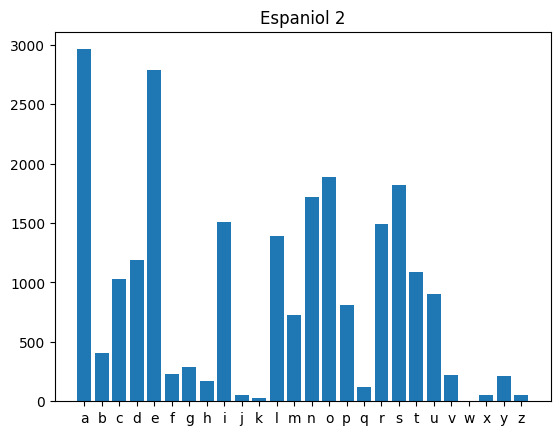

In [13]:
unigram_es1 = Counter(ngrams(es1,1))
plothistogram(unigram_es1)
plt.title('Espaniol 1')
plt.show()
unigram_es2 = Counter(ngrams(es2,1))
plothistogram(unigram_es2)
plt.title('Espaniol 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

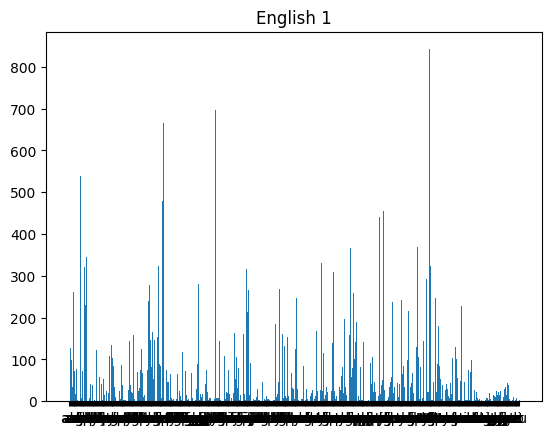

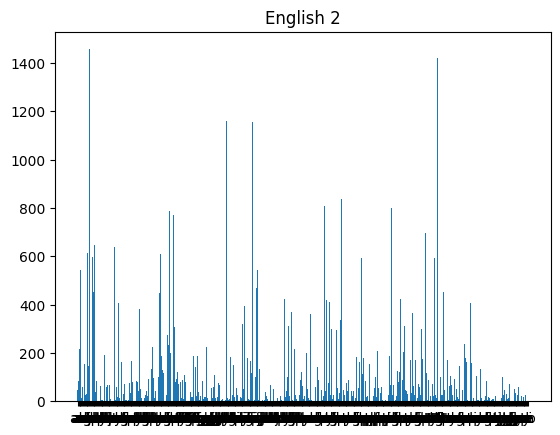

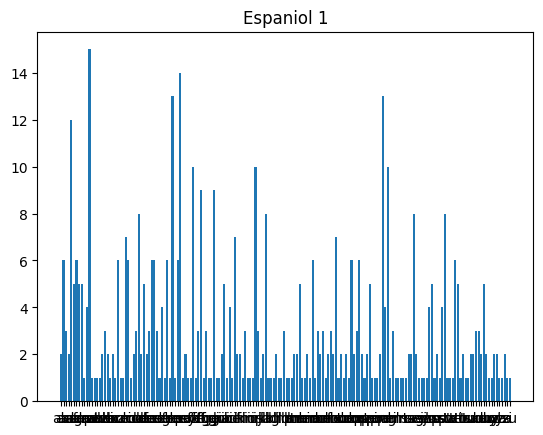

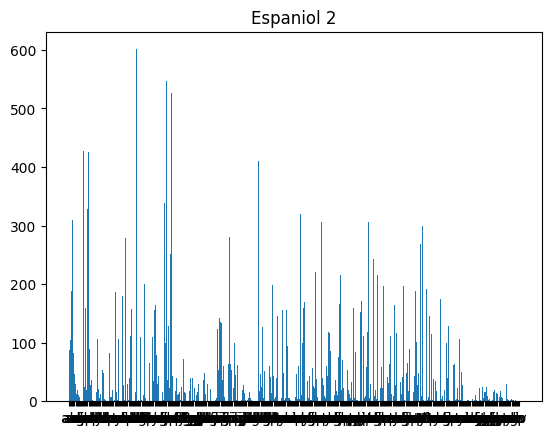

In [28]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_es1 = Counter(ngrams(es1,2))
plothistogram(bigram_es1)
plt.title('Espaniol 1')
plt.show()

bigram_es2 = Counter(ngrams(es2,2))
plothistogram(bigram_es2)
plt.title('Espaniol 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [16]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

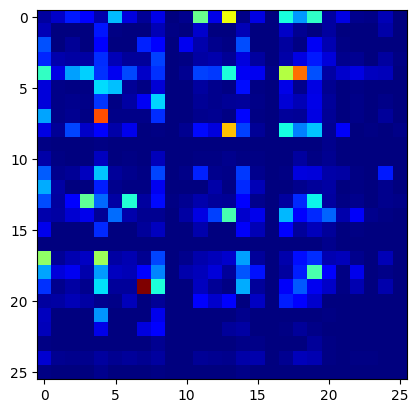

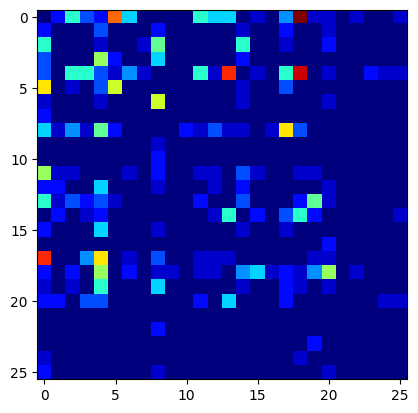

In [21]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bies1 = plotbihistogram(bigram_es1)

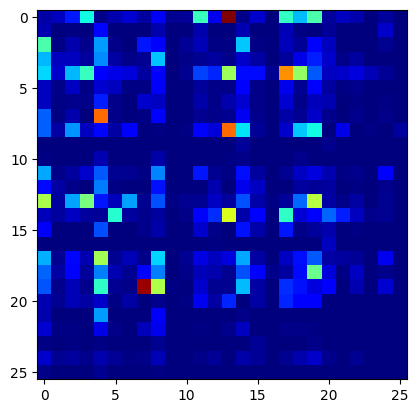

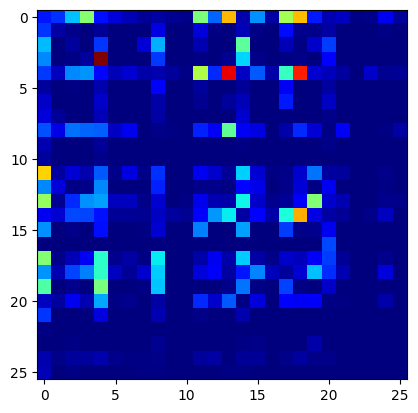

In [22]:
bieng2 = plotbihistogram(bigram_eng2)
plt.show()
bies2 = plotbihistogram(bigram_es2)

Let us look at the top 10 ngrams for each text.

In [25]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=5):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [26]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nEspaniol 1:')
ShowTopN(bies1)
print('\nEspaniol 2:')
ShowTopN(bies2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0

English 2:
('a', 'n') : 1456.0
('t', 'h') : 1419.0
('h', 'e') : 1158.0
('i', 'n') : 1157.0
('e', 'r') : 1101.0

Espaniol 1:
('a', 's') : 15.0
('e', 's') : 14.0
('r', 'a') : 13.0
('e', 'n') : 13.0
('a', 'f') : 12.0

Espaniol 2:
('d', 'e') : 601.0
('e', 'n') : 547.0
('e', 's') : 526.0
('o', 's') : 435.0
('a', 'n') : 428.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages. **(Tried with Spanish)**
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?**(Chnaged the topic from elephant to banana)**
3. How can we use and visualize trigrams and higher n-grams?**(just increase the number parameter in the ngrams function from the nltk)**

# Part 2: Written numbers

We will use a subset of the MNIST (Modified National Institute of Standards and Technology database) dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [27]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [32]:
no1 = train_X[train_y==1,:,:]
no2 = train_X[train_y==2,:,:]

Let us visualize a few images here:

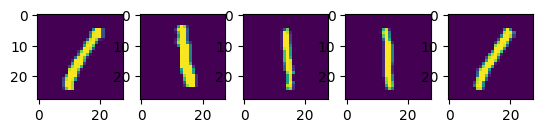

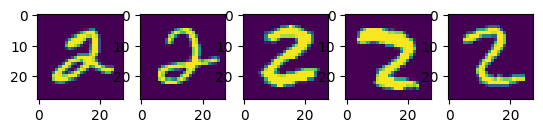

In [33]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [34]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum2 = np.sum(no2>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

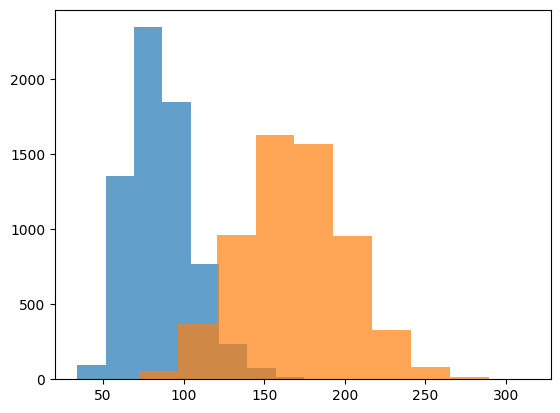

In [38]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum2, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [39]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

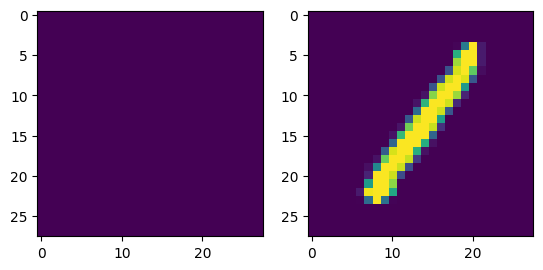

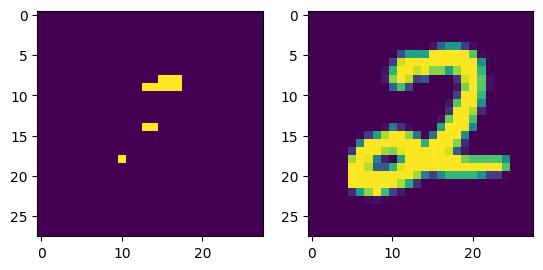

In [44]:
imgs = [no1[450,:,:],  no2[450,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

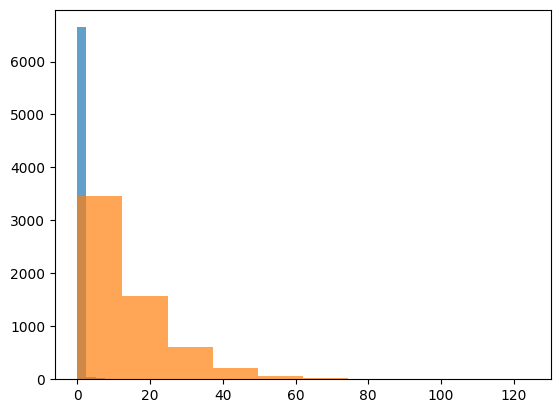

In [47]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole2 = np.array([getHolePixels(i).sum() for i in no2])

plt.hist(hole1, alpha=0.7);
plt.hist(hole2, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [48]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

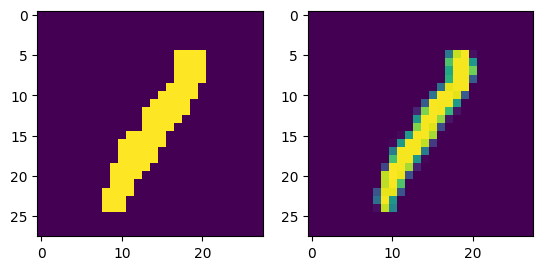

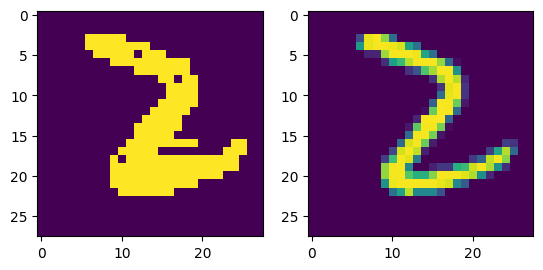

In [49]:
imgs = [no1[456,:,:],  no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

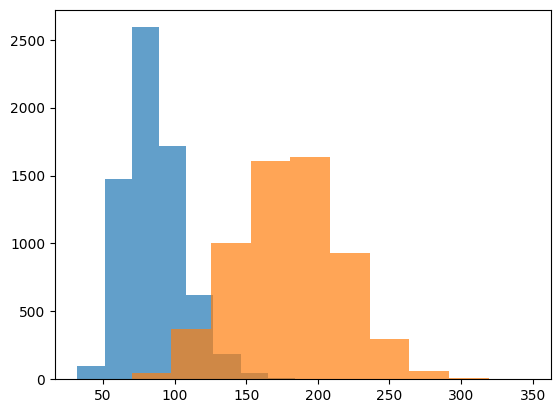

In [50]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull2 = np.array([getHullPixels(i).sum() for i in no2])

plt.hist(hull1, alpha=0.7);
plt.hist(hull2, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [51]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

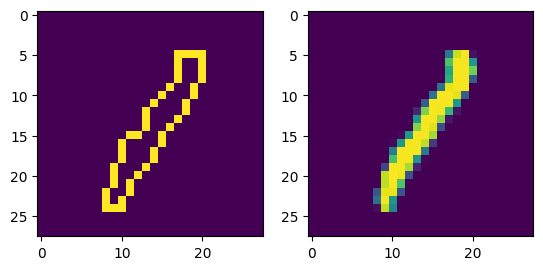

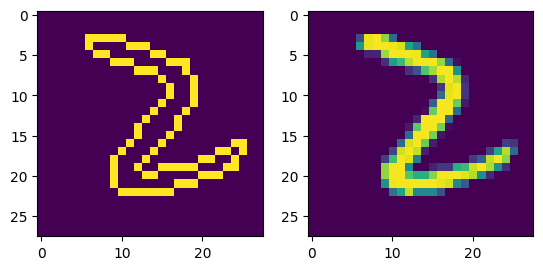

In [52]:
imgs = [no1[456,:,:],  no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

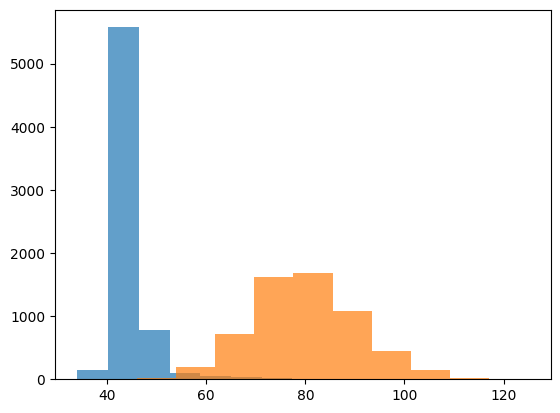

In [53]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound2= np.array([getBoundaryPixels(i).sum() for i in no2])

plt.hist(bound1, alpha=0.7);
plt.hist(bound2, alpha=0.7);

What will happen if we plot two features together?

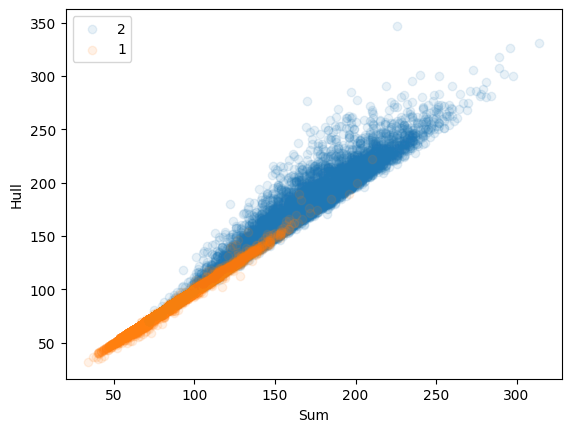

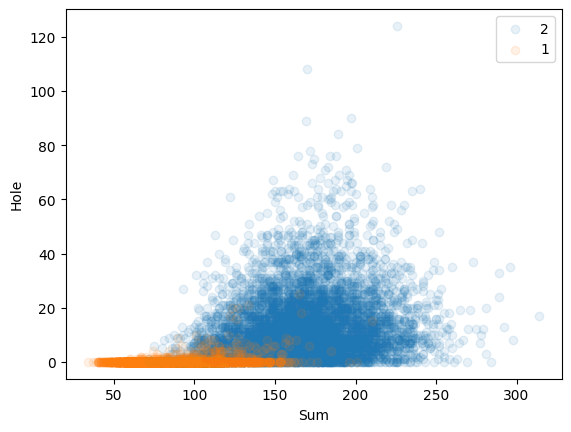

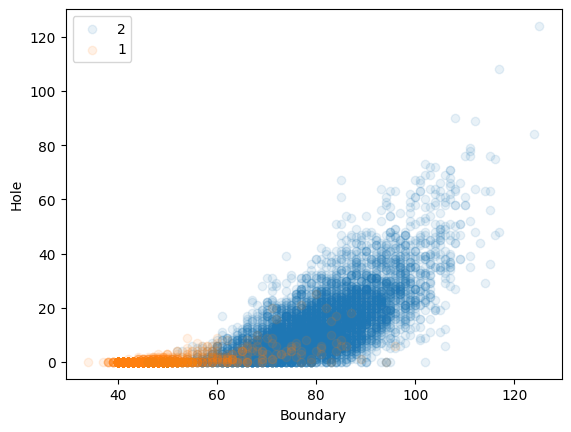

In [55]:
# Sum and hull
plt.scatter(sum2, hull2, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['2','1'])
plt.show()

# Sum and hole
plt.scatter(sum2, hole2, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['2','1'])
plt.show()

# Hole and boundary
plt.scatter(bound2, hole2, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['2','1'])
plt.show()

Now let us try plotting 3 features together.

In [62]:
cl1 = ['class 1']*len(sum1)
cl2 = ['class 2']*len(sum2)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole2)), np.concatenate((sum1,sum2)),
                           np.concatenate((bound1,bound2)), np.concatenate((cl1, cl2)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?**(pixel vectors along with classification)**
2. How would you test or visualize four or more features?**(To visualize four or more features, you can use techniques like dimensionality reduction, scatter plots, heatmaps, or machine learning models.)**
3. Can you come up with your own features?**(Yes)**
4. Will these features work for different classes other than 0 and 1?**(The features derived from MNIST can work for classifying digits from 0 to 9, covering all possible classes.)**
5. What will happen if we take more that two classes at a time?**(we can extend classification model to handle all classes from 0 to 9)**